# Propósito del Modelo
El objetivo es hacer análisis que involucran múltiples variables de diferentes bases de datos combinadas.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

main_gdp = pd.read_csv('main_gdp.csv', index_col=['Country Name', 'Country Code'])
main_government = pd.read_csv('main_government.csv', index_col=['Country Name', 'Country Code'])
main_investments = pd.read_csv('main_investments.csv', index_col=['Country Name', 'Country Code'])
main_consumption = pd.read_csv('main_consumption.csv', index_col=['Country Name', 'Country Code'])
main_trade = pd.read_csv('main_trade.csv', index_col=['Country Name', 'Country Code'])

(main_gdp.head(), main_government.head(), main_investments.head(), main_consumption.head(), main_trade.head())

(                                              1960      1961      1962  \
 Country Name                Country Code                                 
 Aruba                       ABW          -0.201874 -0.200982 -0.200327   
 Africa Eastern and Southern AFE          -0.094914 -0.098259 -0.094392   
 Afghanistan                 AFG          -0.201874 -0.200982 -0.200327   
 Africa Western and Central  AFW          -0.135881 -0.136426 -0.136892   
 Angola                      AGO          -0.201874 -0.200982 -0.200327   
 
                                               1963      1964      1965  \
 Country Name                Country Code                                 
 Aruba                       ABW          -0.199863 -0.200426 -0.202832   
 Africa Eastern and Southern AFE          -0.094446 -0.097204 -0.095992   
 Afghanistan                 AFG          -0.199863 -0.200426 -0.202832   
 Africa Western and Central  AFW          -0.135198 -0.136542 -0.136252   
 Angola                

#### Unir múltiples DataFrames al mismo tiempo con sufijos especificados

In [2]:
# Unir los DataFrames uno por uno
df_combined = main_gdp.join(main_government, lsuffix='_gdp', rsuffix='_gov')
df_combined = df_combined.join(main_investments, rsuffix='_inv')
df_combined = df_combined.join(main_consumption, rsuffix='_con')
df_combined = df_combined.join(main_trade, rsuffix='_trade')


# Corregir la fórmula para calcular el GDP correctamente usando los sufijos adecuados para cada año
for year in range(1960, 2023):
    gdp_col = f'{year}_gdp' if f'{year}_gdp' in df_combined.columns else str(year)
    gov_col = f'{year}_gov' if f'{year}_gov' in df_combined.columns else str(year)
    inv_col = f'{year}_inv' if f'{year}_inv' in df_combined.columns else str(year)
    con_col = f'{year}_con' if f'{year}_con' in df_combined.columns else str(year)
    trade_col = f'{year}_trade' if f'{year}_trade' in df_combined.columns else str(year)

    df_combined[f'GDP_calculated_{year}'] = (df_combined[gdp_col] +
                                             df_combined[gov_col] +
                                             df_combined[inv_col] +
                                             df_combined[con_col] +
                                             df_combined[trade_col])

df_combined[[f'GDP_calculated_{year}' for year in range(1960, 2023)]].head()

,,GDP_calculated_1960,GDP_calculated_1961,GDP_calculated_1962,GDP_calculated_1963,GDP_calculated_1964,GDP_calculated_1965,GDP_calculated_1966,GDP_calculated_1967,GDP_calculated_1968,GDP_calculated_1969,...,GDP_calculated_2013,GDP_calculated_2014,GDP_calculated_2015,GDP_calculated_2016,GDP_calculated_2017,GDP_calculated_2018,GDP_calculated_2019,GDP_calculated_2020,GDP_calculated_2021,GDP_calculated_2022
Country Name,Country Code,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,-0.687051,-0.688787,-0.705721,-0.732952,-0.740670,-0.789346,-0.816753,-0.805947,-0.813468,-0.821448,...,-1.017331,-1.023442,-1.046426,-0.965575,-0.972609,-1.011146,-1.006774,-0.976539,-0.925748,-0.925497
Africa Eastern and Southern,AFE,1.964340,1.768977,2.534770,2.382340,2.319873,2.892425,4.186396,3.520173,3.487117,4.356643,...,-0.770508,-0.786264,-0.840639,-0.740249,-0.747085,-0.788861,-0.786684,-0.756719,-0.599803,-0.593651
Afghanistan,AFG,-0.687051,-0.688787,-0.705721,-0.732952,-0.740670,-0.789346,-0.816753,-0.805947,-0.813468,-0.821448,...,-1.015306,-1.021407,-1.044415,-0.963573,-0.970639,-1.009221,-1.004804,-0.972484,-0.923705,-0.918717
Africa Western and Central,AFW,-0.621058,-0.624231,-0.642287,-0.668287,-0.676786,-0.722767,-0.755287,-0.753854,-0.419140,-0.286099,...,-0.264882,-0.453932,-0.876033,-0.872786,-0.756485,-0.585735,-0.685331,-0.871547,-0.834270,-0.833380
Angola,AGO,-0.687051,-0.646070,-0.672906,-0.698693,-0.677888,-0.782412,-0.789625,-0.805947,-0.813468,-0.821448,...,-0.465233,-0.657339,-0.932675,-0.812782,-0.736018,-0.664243,-0.802329,-0.931221,-0.917089,-0.923103


In [3]:
df_combined.describe(), df_combined.info(), df_combined.shape, df_combined.columns, df_combined.index, df_combined.dtypes, df_combined.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 239 entries, ('Aruba', 'ABW') to ('Zimbabwe', 'ZWE')
Columns: 376 entries, 1960_gdp to GDP_calculated_2022
dtypes: float64(376)
memory usage: 731.2+ KB


(         1960_gdp    1961_gdp    1962_gdp    1963_gdp    1964_gdp    1965_gdp  \
 count  239.000000  239.000000  239.000000  239.000000  239.000000  239.000000   
 mean    -0.081045   -0.080586   -0.079957   -0.079715   -0.080026   -0.081028   
 std      0.811894    0.811040    0.811016    0.810860    0.810938    0.811302   
 min     -0.224510   -0.223332   -0.222338   -0.222336   -0.222801   -0.221246   
 25%     -0.202029   -0.205308   -0.204461   -0.204545   -0.204212   -0.207263   
 50%     -0.201874   -0.200982   -0.200327   -0.199863   -0.200426   -0.202832   
 75%     -0.201874   -0.200982   -0.200327   -0.199863   -0.200426   -0.202832   
 max      8.925325    8.916576    8.903261    8.903658    8.909846    8.905935   
 
          1966_gdp    1967_gdp    1968_gdp    1969_gdp  ...  \
 count  239.000000  239.000000  239.000000  239.000000  ...   
 mean    -0.080735   -0.080437   -0.081089   -0.082057  ...   
 std      0.811470    0.810851    0.810718    0.810380  ...   
 min    

## Prueba ADF 

In [4]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic': round(r[0], 4), 'pvalue': round(r[1], 4), 'n_lags': r[2], 'n_obs': r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Imprimir Resultados de la Prueba
    if verbose:
        print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
        print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
        print(f' Significance Level    = {signif}')
        print(f' Test Statistic        = {output["test_statistic"]}')
        print(f' No. Lags Chosen       = {output["n_lags"]}')

        for key, val in r[4].items():
            print(f' Critical value {adjust(key)} = {round(val, 3)}')

        if p_value <= signif:
            print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
            print(f" => Series is Stationary.")
        else:
            print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
            print(f" => Series is Non-Stationary.")
    
    return output

# Aplicar al año 2021
series = df_combined['GDP_calculated_2021']
result = test_stationarity(series, name='GDP_calculated_2021', verbose=True)

    Augmented Dickey-Fuller Test on "GDP_calculated_2021" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.8577
 No. Lags Chosen       = 0
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


## Análisis de Componentes Temporales

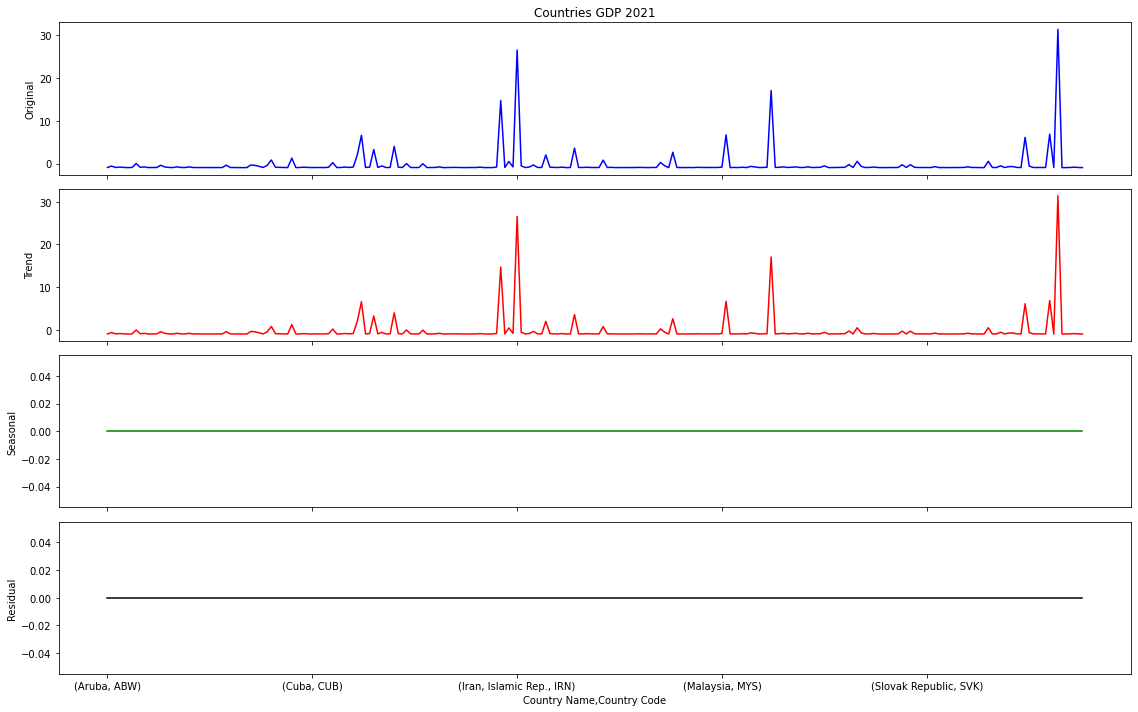

In [5]:
def decompose_time_series(series, title):
    if len(series) > 2:  
        decomposition = sm.tsa.seasonal_decompose(series, model='additive', period=1)  
        # Crear gráficos de los componentes
        fig, ax = plt.subplots(4, 1, figsize=(16, 10), sharex=True)
        series.plot(ax=ax[0], color='b', title=title)
        ax[0].set_ylabel('Original')
        decomposition.trend.plot(ax=ax[1], color='r')
        ax[1].set_ylabel('Trend')
        decomposition.seasonal.plot(ax=ax[2], color='g')
        ax[2].set_ylabel('Seasonal')
        decomposition.resid.plot(ax=ax[3], color='k')
        ax[3].set_ylabel('Residual')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data to decompose {title}")

decompose_time_series(df_combined['GDP_calculated_2021'], 'Countries GDP 2021')

### Homocedasticidad

C:\Users\Oscar Murgueytio\AppData\Local\Programs\Python\Python310\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\Oscar Murgueytio\AppData\Local\Programs\Python\Python310\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
C:\Users\Oscar Murgueytio\AppData\Local\Programs\Python\Python310\lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)


p-value de la prueba de Breusch-Pagan: 0.00017441609247072733


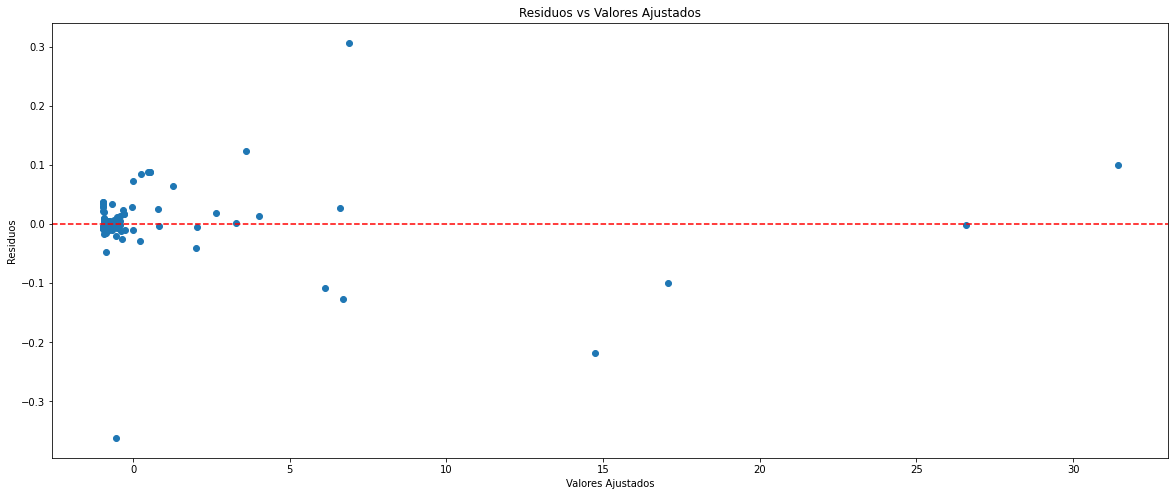

In [6]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

modelo = 'GDP_calculated_2022 ~ GDP_calculated_2021'

model = ols(modelo, data=df_combined).fit()

residuos = model.resid

# Prueba de Breusch-Pagan
_, pvalue, _, _ = het_breuschpagan(residuos, model.model.exog)
print(f"p-value de la prueba de Breusch-Pagan: {pvalue}")

plt.figure(figsize=(20, 8))
plt.scatter(model.fittedvalues, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

# Si el p-value es menor a 0.05, existe evidencia de heterocedasticidad.

### Weighted Least Squares (WLS)

In [7]:
import statsmodels.api as sm

X = df_combined[['2020_gov', '2020', '2020_con', '2020_trade']]  # G + I + C + T
y = df_combined['GDP_calculated_2021']  

# Agregar una constante al modelo
X = sm.add_constant(X)

# Modelo OLS para obtener los residuos
model_ols = sm.OLS(y, X).fit()
residuos = model_ols.resid

# Calcular los pesos como el inverso de los residuos al cuadrado
pesos = 1.0 / (residuos ** 2)

# Aplicar WLS con los pesos obtenidos
model_wls = sm.WLS(y, X, weights=pesos).fit()

print(model_wls.summary())

                             WLS Regression Results                            
Dep. Variable:     GDP_calculated_2021   R-squared:                       1.000
Model:                             WLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 2.752e+06
Date:                 Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                         14:17:06   Log-Likelihood:                 733.57
No. Observations:                  239   AIC:                            -1457.
Df Residuals:                      234   BIC:                            -1440.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0637      0.004    -16.68

### Normalidad de los Residuos

In [8]:
import scipy.stats as stats

residuos = model_wls.resid

# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)

print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test:
Statistic: 0.2418427268818486
p-value: 4.245462941888389e-30


### Ausencia de Multicolinealidad

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF para cada variable en el modelo
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

      feature        VIF
0       const   1.037174
1    2020_gov  16.410593
2        2020   1.004569
3    2020_con  16.409976
4  2020_trade   1.004691


### Regresión Robusta

                     Robust linear Model Regression Results                    
Dep. Variable:     GDP_calculated_2021   No. Observations:                  239
Model:                             RLM   Df Residuals:                      234
Method:                           IRLS   Df Model:                            4
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Tue, 14 May 2024                                         
Time:                         14:17:14                                         
No. Iterations:                     50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0776      0.001   -153.86

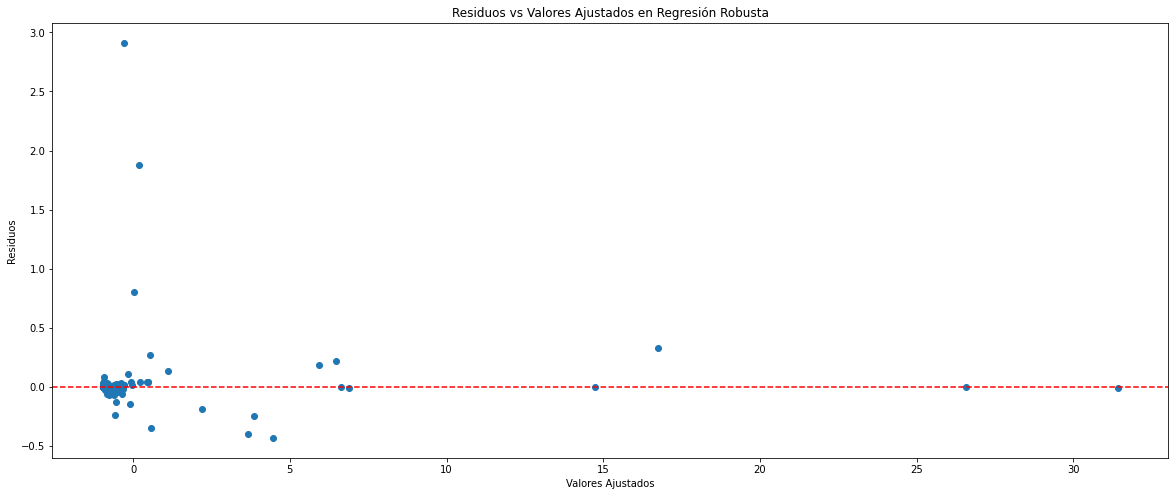

In [10]:
import statsmodels.api as sm

X = df_combined[['2020_gov', '2020', '2020_con', '2020_trade']]  # Predictores 
y = df_combined['GDP_calculated_2021']  # La variable objetivo

# Agrega una constante al modelo
X = sm.add_constant(X)

# Crear y ajustar un modelo de regresión lineal robusta
model_robust = sm.RLM(y, X).fit()

# Resumen del modelo
print(model_robust.summary())

# Visualizar los residuos y verificar la mejora
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.scatter(model_robust.fittedvalues, model_robust.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados en Regresión Robusta')
plt.show()

### Diagnóstico Visual de los Residuos

Shapiro-Wilk Test - Statistic: 0.33540911798629547, p-value: 1.3335239077225291e-28
Breusch-Pagan Test - p-value: 4.210590527338177e-14
      feature        VIF
0       const   1.037174
1    2020_gov  16.410593
2        2020   1.004569
3    2020_con  16.409976
4  2020_trade   1.004691
                             OLS Regression Results                            
Dep. Variable:     GDP_calculated_2021   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.997
Method:                  Least Squares   F-statistic:                 1.725e+04
Date:                 Tue, 14 May 2024   Prob (F-statistic):          8.71e-288
Time:                         14:17:19   Log-Likelihood:                 56.088
No. Observations:                  239   AIC:                            -102.2
Df Residuals:                      234   BIC:                            -84.79
Df Model:                            4                                    

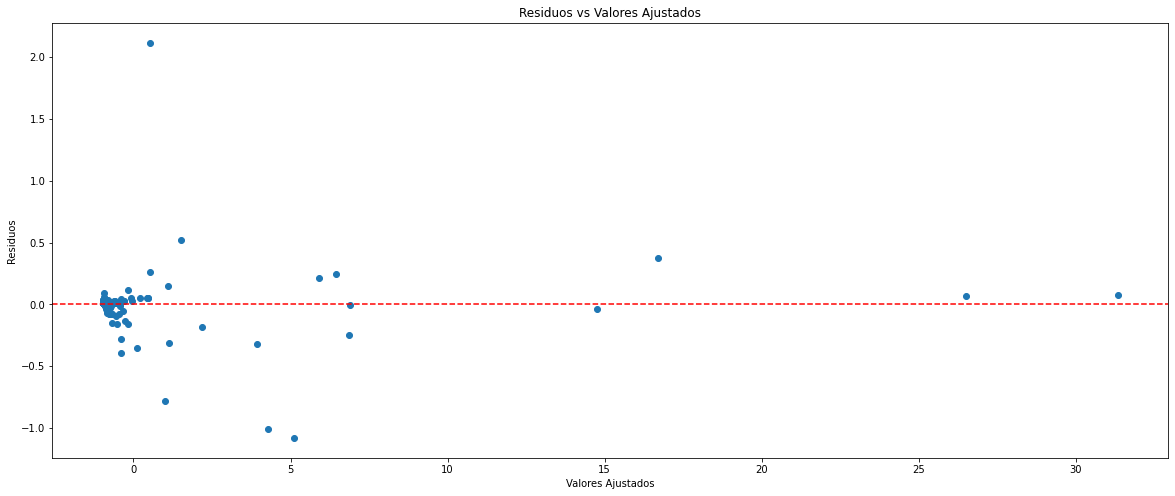

In [11]:
import statsmodels.api as sm
from scipy.stats import shapiro
import statsmodels.stats.diagnostic as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prueba de Normalidad de los Residuos con Shapiro-Wilk
stat, p_value = shapiro(model_ols.resid)
print(f'Shapiro-Wilk Test - Statistic: {stat}, p-value: {p_value}')

# Verificación de Homocedasticidad con Breusch-Pagan
_, p_value, _, _ = sms.het_breuschpagan(model_ols.resid, model_ols.model.exog)
print(f'Breusch-Pagan Test - p-value: {p_value}')

# Calculando VIF para cada predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Resumen del modelo para ajuste
print(model_ols.summary())

# Diagnóstico visual de residuos
plt.figure(figsize=(20, 8))
plt.scatter(model_ols.fittedvalues, model_ols.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.show()

## Guardar los DataFrames como CSV

In [12]:
# Guardar el DataFrame como CSV
df_combined.to_csv('df_combined.csv', index=False)

In [13]:
# Detalles de las columnas
df_combined.columns.values[:376]

array(['1960_gdp', '1961_gdp', '1962_gdp', '1963_gdp', '1964_gdp',
       '1965_gdp', '1966_gdp', '1967_gdp', '1968_gdp', '1969_gdp',
       '1970_gdp', '1971_gdp', '1972_gdp', '1973_gdp', '1974_gdp',
       '1975_gdp', '1976_gdp', '1977_gdp', '1978_gdp', '1979_gdp',
       '1980_gdp', '1981_gdp', '1982_gdp', '1983_gdp', '1984_gdp',
       '1985_gdp', '1986_gdp', '1987_gdp', '1988_gdp', '1989_gdp',
       '1990_gdp', '1991_gdp', '1992_gdp', '1993_gdp', '1994_gdp',
       '1995_gdp', '1996_gdp', '1997_gdp', '1998_gdp', '1999_gdp',
       '2000_gdp', '2001_gdp', '2002_gdp', '2003_gdp', '2004_gdp',
       '2005_gdp', '2006_gdp', '2007_gdp', '2008_gdp', '2009_gdp',
       '2010_gdp', '2011_gdp', '2012_gdp', '2013_gdp', '2014_gdp',
       '2015_gdp', '2016_gdp', '2017_gdp', '2018_gdp', '2019_gdp',
       '2020_gdp', '2021_gdp', '2022_gdp', '1960_gov', '1961_gov',
       '1962_gov', '1963_gov', '1964_gov', '1965_gov', '1966_gov',
       '1967_gov', '1968_gov', '1969_gov', '1970_gov', '1971_g

In [14]:
df_combined.values[:376]

array([[-0.20187388, -0.20098171, -0.20032654, ..., -0.97653872,
        -0.92574843, -0.92549705],
       [-0.09491353, -0.09825918, -0.09439167, ..., -0.75671896,
        -0.59980343, -0.59365105],
       [-0.20187388, -0.20098171, -0.20032654, ..., -0.97248442,
        -0.9237053 , -0.9187167 ],
       ...,
       [-0.16960274, -0.16843671, -0.16711353, ..., -0.79129927,
        -0.85280902, -0.85958157],
       [-0.22148338, -0.22037191, -0.21961394, ..., -0.95118224,
        -0.92343036, -0.92314575],
       [-0.22099433, -0.2197217 , -0.21887512, ..., -0.98686413,
        -0.95003866, -0.95714594]])

In [15]:
df_combined.isnull().sum()

1960_gdp               0
1961_gdp               0
1962_gdp               0
1963_gdp               0
1964_gdp               0
                      ..
GDP_calculated_2018    0
GDP_calculated_2019    0
GDP_calculated_2020    0
GDP_calculated_2021    0
GDP_calculated_2022    0
Length: 376, dtype: int64

In [16]:
df_combined.iloc[:376].isnull().sum()

1960_gdp               0
1961_gdp               0
1962_gdp               0
1963_gdp               0
1964_gdp               0
                      ..
GDP_calculated_2018    0
GDP_calculated_2019    0
GDP_calculated_2020    0
GDP_calculated_2021    0
GDP_calculated_2022    0
Length: 376, dtype: int64

In [17]:
# Verificar NaNs en las primeras 376 filas y los tipos de datos
print(df_combined.iloc[:376].isnull().sum())
print(df_combined.iloc[:376].dtypes)

1960_gdp               0
1961_gdp               0
1962_gdp               0
1963_gdp               0
1964_gdp               0
                      ..
GDP_calculated_2018    0
GDP_calculated_2019    0
GDP_calculated_2020    0
GDP_calculated_2021    0
GDP_calculated_2022    0
Length: 376, dtype: int64
1960_gdp               float64
1961_gdp               float64
1962_gdp               float64
1963_gdp               float64
1964_gdp               float64
                        ...   
GDP_calculated_2018    float64
GDP_calculated_2019    float64
GDP_calculated_2020    float64
GDP_calculated_2021    float64
GDP_calculated_2022    float64
Length: 376, dtype: object
